## Using CNNs to Classify Hand-written Digits on MNIST Dataset


In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras
from keras.datasets import mnist


#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#one record from training set 
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

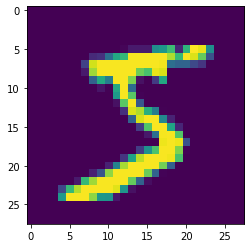

In [7]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0])


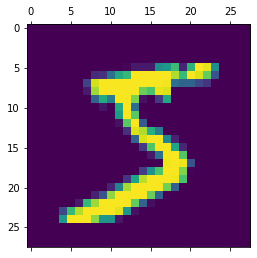

In [8]:
plt.matshow(X_train[0])
#plt.show(X_train[0])

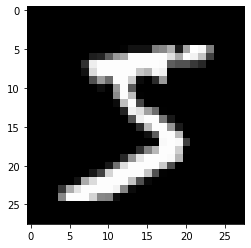

In [9]:
import matplotlib.pyplot as plt

#plot the first image in the dataset with gray scale
plt.imshow(X_train[0],cmap="gray")


In [10]:
y_train[0]

5

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D
from keras.optimizers import Adam


In [12]:
"""#reshape data to fit model
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

X_train.shape"""

'#reshape data to fit model\nX_train = X_train.reshape(60000,28*28)\nX_test = X_test.reshape(10000,28*28)\n\nX_train.shape'

In [13]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [15]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Epoch 1/3
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1996 - accuracy: 0.9546 - val_loss: 0.0897 - val_accuracy: 0.9714
Epoch 2/3
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0972 - val_accuracy: 0.9740
Epoch 3/3
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0897 - val_accuracy: 0.9767
